In [3]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time
from itertools import product

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [4]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

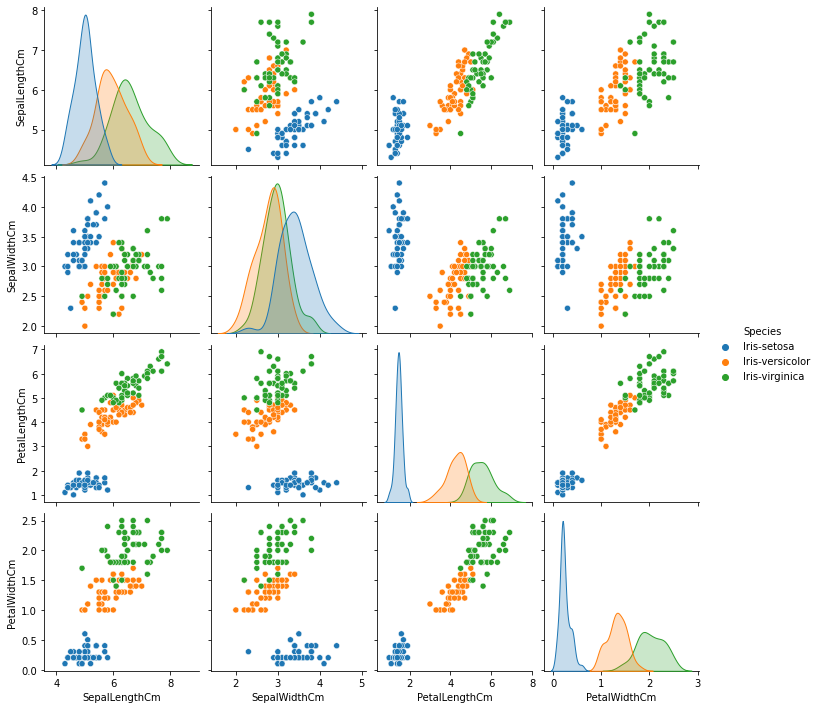

In [5]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

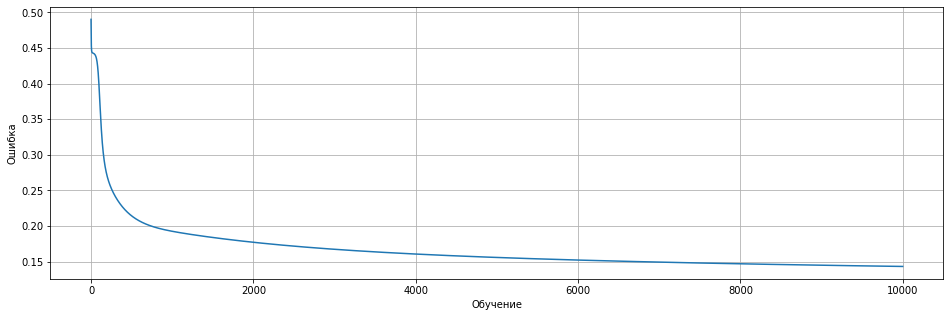

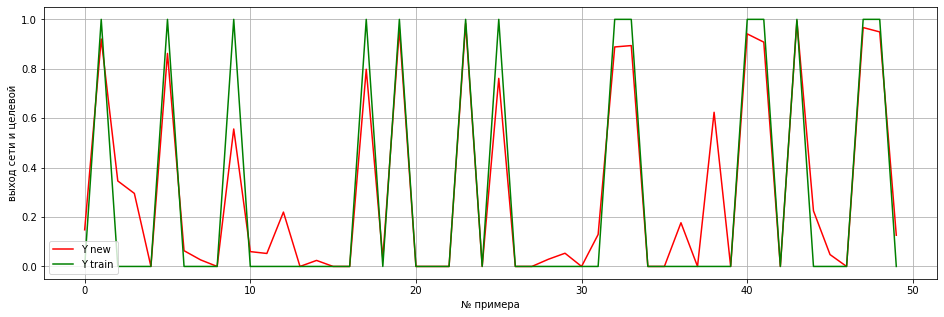

Аккуратность нейронной сети 85.69%


In [6]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 2


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.grid()
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



In [7]:
w1

array([[  3.22704064, -34.7035805 ,  -2.04463761],
       [-30.15963033,   6.132211  ,  -2.21309771]])

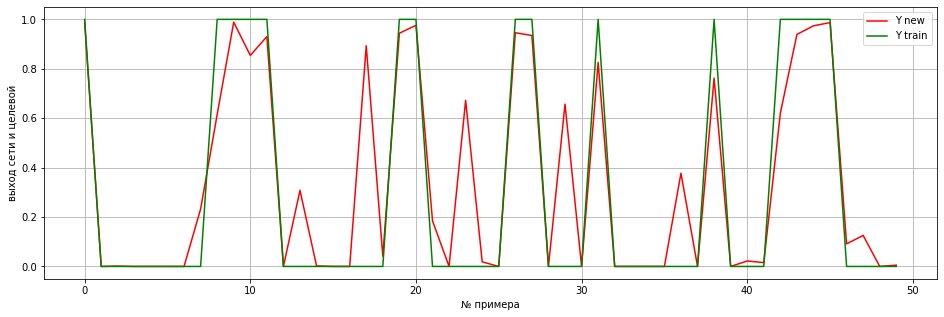

Аккуратность нейронной сети на тесте 83.83%


In [8]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.grid()
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

Мы разобрались с основами обучения нейронных сетей и получили некоторое представление об архитектурах простых нейронных сетей. Давайте попробуем закрепить эти знания на практике. Кроме того на примере который будет изложен ниже возможно проясняться какие-либо оставшиеся вопросы.

В данном примере мы сделаем нейронную сеть которая будет отличать различные виды ириса между собой. Надо полагать данный датасет вам уже знаком. Логика работы этого кода будет такой же как и в первом разобранном примере, но только все компоненты этого кода будут несколько усложнены.

In [27]:

params = {
    'neuron_numb': [1,2,4,7,10],
    'n_epoch': [100, 1000, 10000, 30000, 50000],
    'n':[0.1, 0.05, 1e-2, 1e-3, 1e-5]
}


def get_best_params(params):
    # массив для ошибок, чтобы потом построить график
    all_param = {}
    acc = []
    for neuron_numb in params['neuron_numb']:
        w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
        w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
        for n_epoch in params['n_epoch']:
            for n in params['n']:
                errors = []
                for i in range(n_epoch):

                    # прямое распространение(feed forward)
                    layer0 = X_train
                    layer1 = sigmoid(np.dot(layer0, w0))
                    layer2 = sigmoid(np.dot(layer1, w1))

                    # обратное распространение(back propagation) с использованием градиентного спуска
                    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
                    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
                    layer1_error = layer2_delta.dot(w1.T)
                    layer1_delta = layer1_error * sigmoid_deriv(layer1)
                    # коррекция
                    w1 += layer1.T.dot(layer2_delta) * n
                    w0 += layer0.T.dot(layer1_delta) * n
                    # метрика модели
                    error = np.mean(np.abs(layer2_error))
                    errors.append(error)
                    accuracy = (1 - error) * 100
                if accuracy > 99:
                    print([neuron_numb,n_epoch,n])
                acc.append(accuracy)
                all_param[accuracy] = [neuron_numb,n_epoch,n]
                #print(accuracy, [neuron_numb,n_epoch,n])
    best_acc = max(acc)
    best_param = all_param[best_acc]
    return [best_acc, best_param]




In [28]:
best_params = get_best_params(params)


[4, 30000, 0.1]
[4, 30000, 0.05]
[4, 30000, 0.01]
[4, 30000, 0.001]
[4, 30000, 1e-05]
[4, 50000, 0.1]
[4, 50000, 0.05]
[4, 50000, 0.01]
[4, 50000, 0.001]
[4, 50000, 1e-05]
[7, 30000, 0.1]
[7, 30000, 0.05]
[7, 30000, 0.01]
[7, 30000, 0.001]
[7, 30000, 1e-05]
[7, 50000, 0.1]
[7, 50000, 0.05]
[7, 50000, 0.01]
[7, 50000, 0.001]
[7, 50000, 1e-05]
[10, 30000, 0.1]
[10, 30000, 0.05]
[10, 30000, 0.01]
[10, 30000, 0.001]
[10, 30000, 1e-05]
[10, 50000, 0.1]
[10, 50000, 0.05]
[10, 50000, 0.01]
[10, 50000, 0.001]
[10, 50000, 1e-05]


In [29]:
best_params


[99.78950402546523, [7, 50000, 1e-05]]

Лучшая точность достигнута при 7 нейронах скрытого слоя, 50 000 эпох и точности  1e-05. Следовательно чем выше количество нейронов и эпох, и чем меньше шаг обучения - тем точнее вычисление. Но, как легко понять - тем вычисления и дороже. И при подборе параметров обучения необходимо в первую очередь определиться с критериями допустимой для нас точности модели.


К примеру, я сделал вывод всех параметров при расчете, если точность выше 99 процентов. И мы видим, что уже при параметрах 4 нейрона, 30000 эпох , 0.1 шаг -  мы уже достигли этой точности, при этом ресурсов на достижение этой цели мы потратили в разы меньше.

Ну и второй момент, который нам изместен из практики - слишком высокая точность модели на тренировочных данных ведет, как правило, к переобучению модели, и соответственно - низкой точности на тесте и валидации